In [1]:
########################################################################
# This notebook aims to do EDA and develope a model on Instagram Reach #
########################################################################

#################################
#  Contents:                    #
#################################
# Part 1.) EDA                  #
# part 2.) Modelling using regression     #
#################################

In [2]:
############################################################################
# Part 1.) Expolatory Data Analysis                                        #
############################################################################

In [23]:
# making Some essential imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
# loading and checking data
dataFrame = pd.read_csv('./instagram_reach.csv')
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [6]:
dataFrame.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


Looking at the data set lets try to do the following:


1.) Plotting word clouds for Captions and hashTags.

2.) developing a relationship between followers and likes.

3.) Time posted and Likes

In [7]:
# lets know what people in this data set are talking about
def WordCloudPlotter(dfColumn):
    colData = dataFrame[dfColumn]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show() 
    

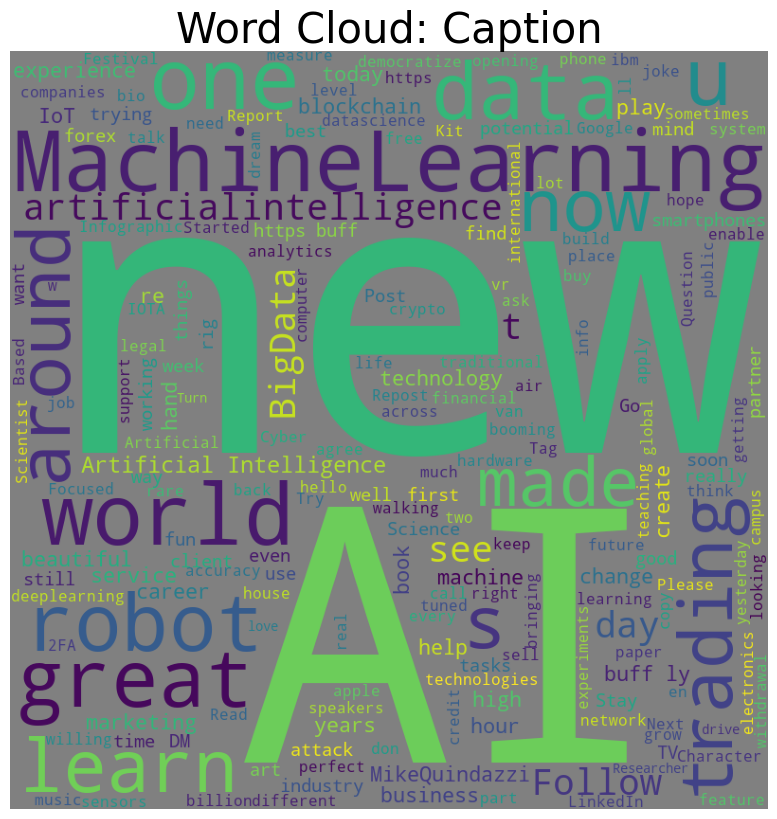

In [8]:
WordCloudPlotter('Caption')

This Word Cloud indicates the following:


1.) This data sets is collected from data sceince enthusiasts.

2.) It is emphasizing on the need of AI-ML.

3.) Fields of applications are being talked about


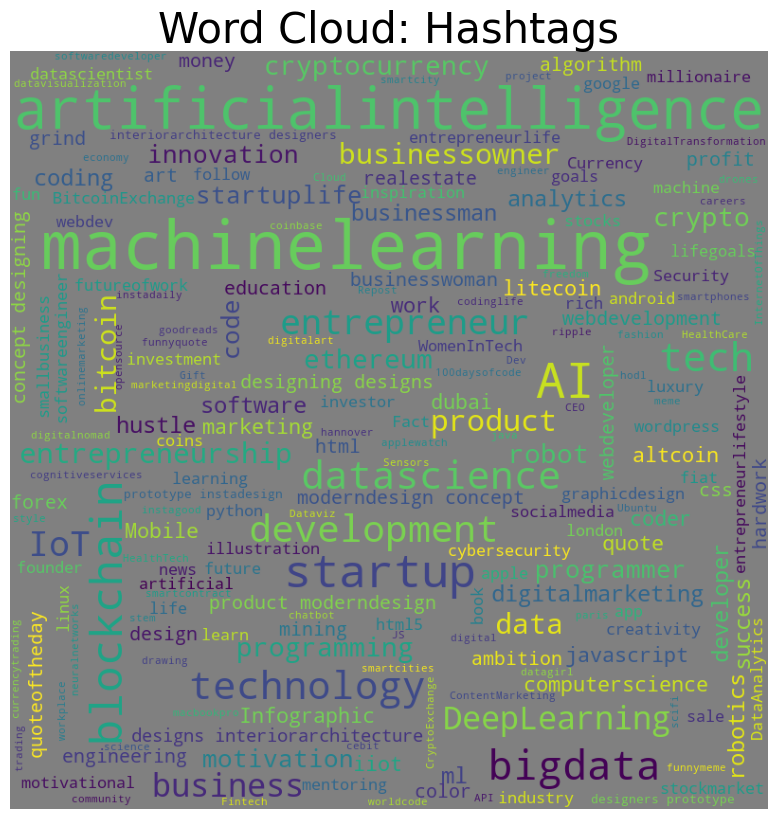

In [9]:
# lets do something similar with hashtags
WordCloudPlotter('Hashtags')

In [10]:
# removing hours and typecasting to int
dataFrame['Time since posted'] = dataFrame['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [11]:
# Plotting Likes relationship with
# Likes and Hours since posted
def PlotDataGiveConclusion2 (featureVector):
    plt.figure(figsize= (20, 10))
    plt.grid(True)
    plt.title('Regplot Plot for '+ str(featureVector[1]) + 'Vs' + featureVector[0])
    sb.regplot(data = dataFrame, x = featureVector[1], y = featureVector[0] , color = 'green')    
    plt.show()

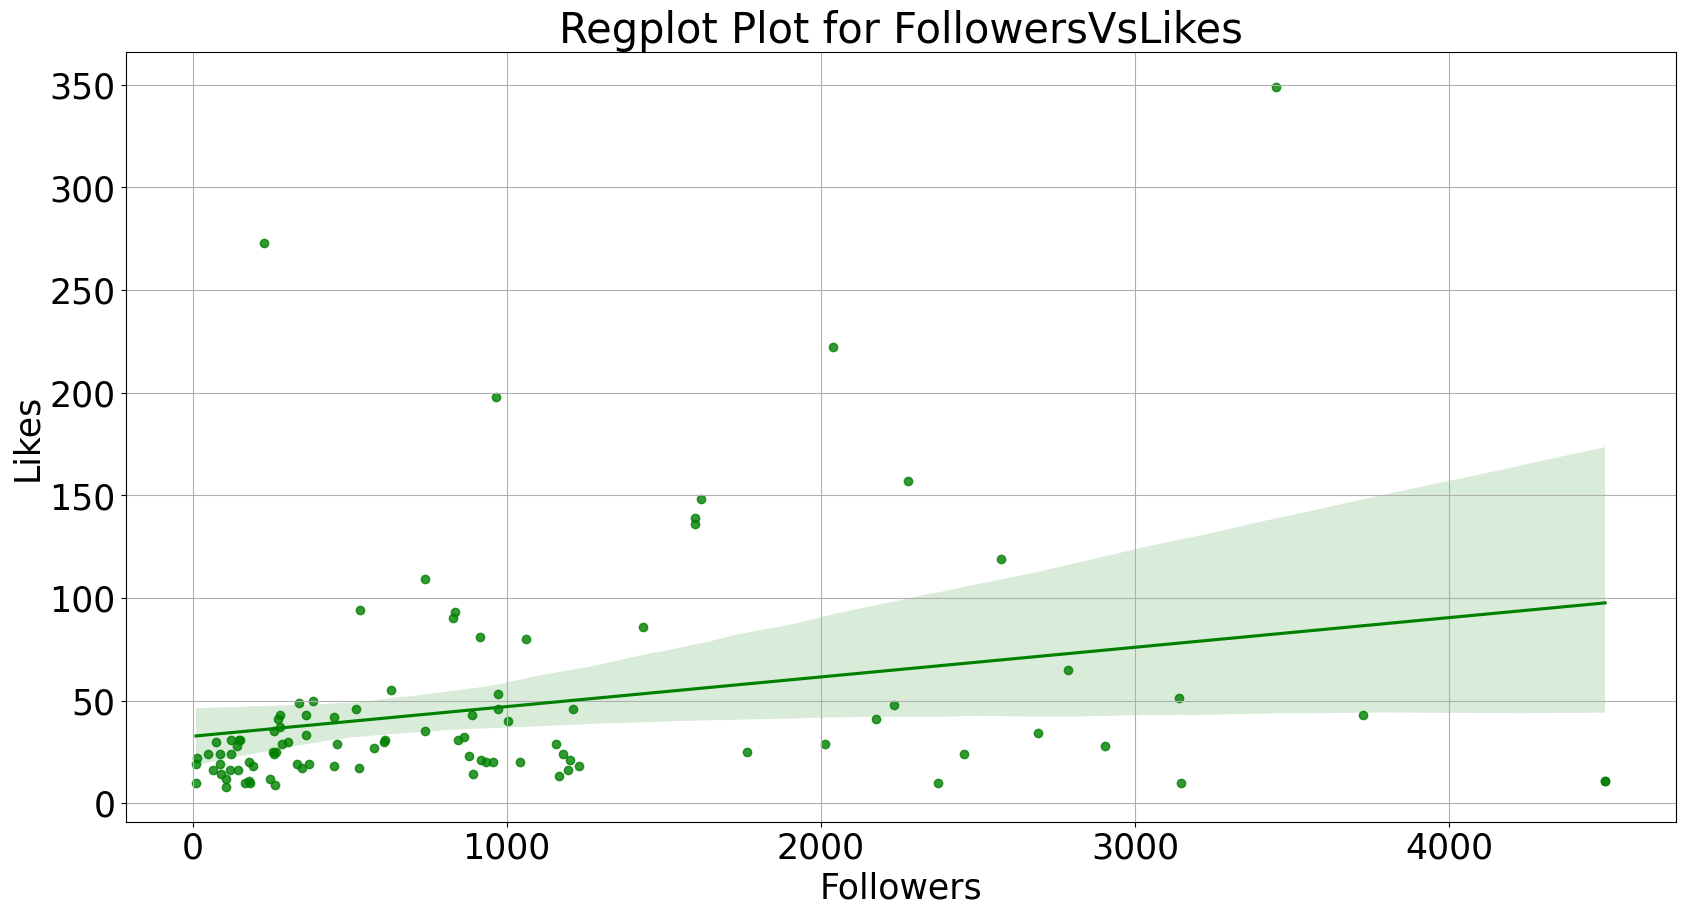

In [12]:
PlotDataGiveConclusion2(['Likes', 'Followers'])

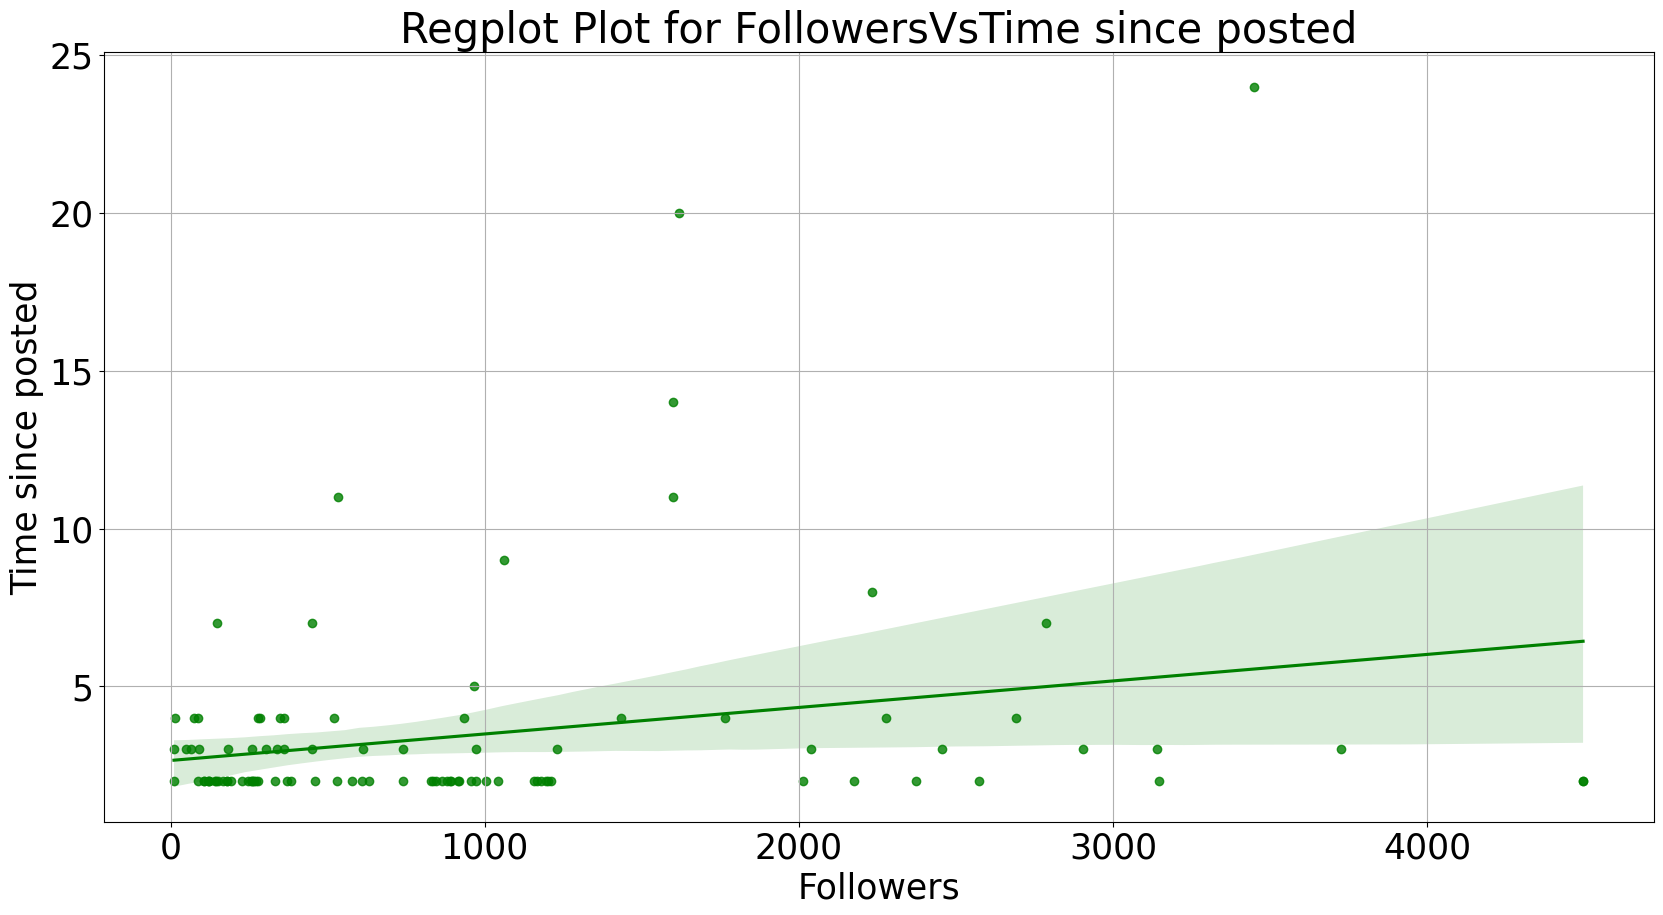

In [13]:
PlotDataGiveConclusion2(['Time since posted', 'Followers'])

In [15]:
dataFrame['Caption'].fillna(dataFrame['Caption'].mode()[0], inplace = True)

In [17]:
dataFrame.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [18]:
dataFrame = dataFrame.drop(columns=['S.No', 'Unnamed: 0'])

In [19]:
dataFrame.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [12]:
##############################################################################
# Part 2.) Predictive Modelling                                              #
##############################################################################

In [21]:
X = dataFrame[['USERNAME', 'Caption', 'Hashtags', 'Followers']]
y_likes = dataFrame['Likes']
y_time_since_posted = dataFrame['Time since posted']

In [24]:
X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(
    X, y_likes, y_time_since_posted, test_size=0.2, random_state=42
)

In [25]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

f:\Mission_Pune\iNeuron\Projects\fsdsmendtoend\env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [28]:
model_likes = LinearRegression()
model_likes.fit(X_train_scaled, y_likes_train)

LinearRegression()

In [29]:
predictions_likes = model_likes.predict(X_test_scaled)

In [30]:
mse_likes = mean_squared_error(y_likes_test, predictions_likes)
print(f'Mean Squared Error (Likes): {mse_likes}')

Mean Squared Error (Likes): 1664.550259035001


In [31]:
model_time = LinearRegression()
model_time.fit(X_train_scaled, y_time_train)

LinearRegression()

In [32]:
predictions_time = model_time.predict(X_test_scaled)

In [33]:
mse_time = mean_squared_error(y_time_test, predictions_time)
print(f'Mean Squared Error (Time Since Posted): {mse_time}')

Mean Squared Error (Time Since Posted): 12.692654179508455


In [13]:
# lets us now develope a prediction model
# in the given data set we can have 2 features
# namely followers and time Posted and our 
# target be number of likes.

# Note since this data set pretains to data science community
# converting hashtags into features,I belive would not be 
# that great of an idea

# gathering features
featureVector = np.array(dataFrame[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(dataFrame['Likes', 'Time since posted'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))


Max value of target is 349.0
